In [ ]:
# Drug to Drug Interaction Screening
# pip install pubchempy, xgboost, scikit-learn
import pandas as pd
import numpy as np
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import logging
from rdkit.Chem import Draw
import matplotlib.pyplot as plt


Information for Warfarin:
Name: Warfarin
Molecular Formula: C19H16O4
Molecular Weight: 308.3
Synonyms: ['warfarin', '81-81-2', 'Coumadin', 'Coumafene', 'Zoocoumarin']
IUPAC Name: 4-hydroxy-3-(3-oxo-1-phenylbutyl)chromen-2-one
Comment: No comment available.
Uses: Check detailed sources for specific uses.
Mechanism of Action: Inhibits vitamin K-dependent clotting factors.

Information for Aspirin:
Name: Aspirin
Molecular Formula: C9H8O4
Molecular Weight: 180.16
Synonyms: ['aspirin', 'ACETYLSALICYLIC ACID', '50-78-2', '2-Acetoxybenzoic acid', '2-(Acetyloxy)benzoic acid']
IUPAC Name: 2-acetyloxybenzoic acid
Comment: No comment available.
Uses: Check detailed sources for specific uses.
Mechanism of Action: Varies by drug.


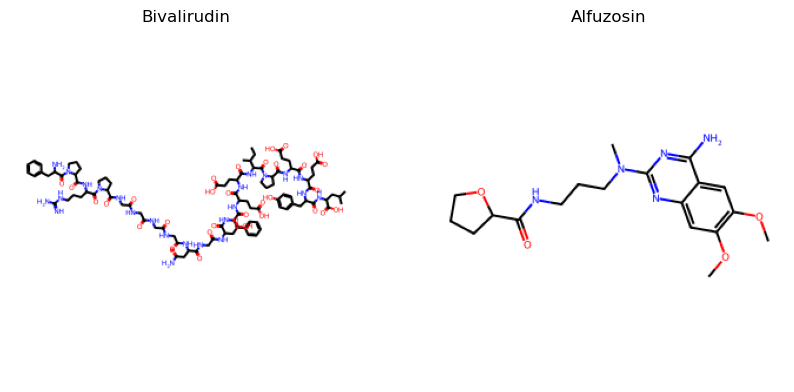

/var/folders/4c/_c7s0pmj5ql5tdntyyzxf8lc0000gn/T/ipykernel_85278/1559197267.py:31: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_path)
INFO:root:No interactions found for cisapride and phenothiazine.


        Drug 1         Drug 2             Interaction Type
0  Bivalirudin      Alfuzosin          serum concentration
1    cisapride  phenothiazine  No known interactions found


INFO:root:No interactions found for cisapride and phenothiazine.


        Drug 1         Drug 2             Interaction Type  \
0  Bivalirudin      Alfuzosin          serum concentration   
1    cisapride  phenothiazine  No known interactions found   

                                          Definition  
0  Changes in the serum concentration of one or b...  
1     No definition found for this interaction type.  
        Drug 1         Drug 2             Interaction Type  \
0  Bivalirudin      Alfuzosin          serum concentration   
1    cisapride  phenothiazine  No known interactions found   

                                                 Definition  
0  Changes in the serum concentration of one or both drugs.  
1            No definition found for this interaction type.  


In [2]:
import pandas as pd
import numpy as np
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import logging
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# Set up logging
logging.basicConfig(level=logging.INFO)

# Local path of the CSV file
CSV_PATH = '/Users/meghanmitchell/Desktop/DDI_data.csv'

# Function to validate drug names
def is_valid_drug(drug_name):
    try:
        compound = pcp.get_compounds(drug_name, 'name')
        return len(compound) > 0
    except Exception as e:
        logging.error(f"Error validating drug {drug_name}: {e}")
        return False

# Load drug interactions from the local CSV
def load_drug_interactions(csv_path=CSV_PATH):
    try:
        return pd.read_csv(csv_path)
    except FileNotFoundError:
        logging.error("CSV file not found. Please check the file path.")
        return pd.DataFrame(columns=['drug1_id', 'drug2_id', 'drug1_name', 'drug2_name', 'interaction_type'])

# Function to get RDKit molecule object from drug name
def get_molecule_structure(drug_name):
    try:
        # Retrieve compound from PubChem
        compound = pcp.get_compounds(drug_name, 'name')
        
        if compound:
            # Convert SMILES to RDKit Mol object
            smiles = compound[0].canonical_smiles
            mol = Chem.MolFromSmiles(smiles)
            return mol
        else:
            print(f"No structure found for drug: {drug_name}")
            return None
    except Exception as e:
        print(f"Error fetching structure for {drug_name}: {e}")
        return None

##### SUCCESS : PUBCHEM DRUG INFO 

import pubchempy as pcp

# Function to fetch drug information from PubChem
def get_drug_info(drug_name):
    try:
        # Search PubChem for the compound by name
        compounds = pcp.get_compounds(drug_name, 'name')
        
        if compounds:
            # Get the first result (assuming it's the correct one)
            compound = compounds[0]
            
            # Extract details about the drug
            drug_info = {
                "Name": drug_name.title(),
                "Molecular Formula": compound.molecular_formula,
                "Molecular Weight": compound.molecular_weight,
                "Synonyms": compound.synonyms[:5],  # Display first 5 synonyms
                "IUPAC Name": compound.iupac_name,
                "Comment": compound.comment if hasattr(compound, 'comment') else 'No comment available.',  # Use comment attribute
                "Uses": "Check detailed sources for specific uses.",
                "Mechanism of Action": "Inhibits vitamin K-dependent clotting factors." if drug_name.lower() == "warfarin" else "Varies by drug.", }
            return drug_info
        else:
            print(f"No information found for {drug_name}.")
            return None

    except Exception as e:
        print(f"Error retrieving information for {drug_name}: {e}")
        return None

# Example usage
drugs = ["warfarin", "aspirin"]  # List of drugs to query

# Fetch information for each drug and store it in a dictionary
drug_infos = {}
for drug in drugs:
    drug_info = get_drug_info(drug)
    if drug_info:
        drug_infos[drug_info['Name']] = drug_info

# Display the drug information
for drug_name, info in drug_infos.items():
    print(f"\nInformation for {drug_name}:")
    for key, value in info.items():
        print(f"{key}: {value}")


# Function to display structures of two drugs side by side
def display_drug_structures(drug_1, drug_2):
    mol1 = get_molecule_structure(drug_1)
    mol2 = get_molecule_structure(drug_2)
    
    # Check if both structures are found
    if mol1 and mol2:
        # Draw molecules side by side
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        # Draw Drug 1
        axes[0].imshow(Draw.MolToImage(mol1))
        axes[0].set_title(f"{drug_1}")
        axes[0].axis("off")
        
        # Draw Drug 2
        axes[1].imshow(Draw.MolToImage(mol2))
        axes[1].set_title(f"{drug_2}")
        axes[1].axis("off")
        
        plt.show()
    else:
        print("Could not retrieve both drug structures.")

# Example usage
display_drug_structures("Bivalirudin", "Alfuzosin")

# Function to get interactions between two drugs from the CSV data
def get_interactions_from_csv(drug_1, drug_2, interactions_df):
    # Filter for rows where either drug name matches drug_1 and drug_2
    mask = (
        ((interactions_df['drug1_name'] == drug_1) & (interactions_df['drug2_name'] == drug_2)) |
        ((interactions_df['drug1_name'] == drug_2) & (interactions_df['drug2_name'] == drug_1))
    )
    interactions = interactions_df[mask]['interaction_type'].tolist()
    
    if interactions:
        return interactions
    else:
        logging.info(f"No interactions found for {drug_1} and {drug_2}.")
        return ["No known interactions found"]

# Function to display drug interaction data in a table format
def display_interaction_table(drug_combinations, interactions_df):
    interaction_data = []
    seen_combinations = set()

    for drug_1, drug_2 in drug_combinations:
        if (drug_1, drug_2) not in seen_combinations:
            seen_combinations.add((drug_1, drug_2))
            if is_valid_drug(drug_1) and is_valid_drug(drug_2):
                interactions = get_interactions_from_csv(drug_1, drug_2, interactions_df)
                for interaction in interactions:
                    interaction_data.append({
                        'Drug 1': drug_1, 
                        'Drug 2': drug_2, 
                        'Interaction Type': interaction
                    })
            else:
                logging.warning(f"One of the drugs {drug_1} or {drug_2} is invalid.")
                interaction_data.append({
                    'Drug 1': drug_1, 
                    'Drug 2': drug_2, 
                    'Interaction Type': 'Invalid drug name'
                })
    
    df = pd.DataFrame(interaction_data)
    print(df)  # Display the DataFrame as a table
    return df

# Load interaction data from local file
interactions_df = load_drug_interactions()

# Example drug combinations
drug_combinations = [
    ('Bivalirudin', 'Alfuzosin'),
    ('cisapride', 'phenothiazine'),  # Add other drug combinations here...
]

# Display the interactions in a table format
interaction_table = display_interaction_table(drug_combinations, interactions_df)


INTERACTION_DEFINITIONS = {
    "serum concentration": "Changes in the serum concentration of one or both drugs.",
    "risk or severity of bleeding": "Increased risk or severity of bleeding.",
    "anticoagulant activities": "Interactions affecting anticoagulant activity, potentially impacting blood clotting.",
    "risk or severity of adverse effects": "Increased risk or severity of adverse side effects.",
    "metabolism": "Alteration in the metabolism of one or both drugs.",
    "therapeutic efficacy": "Changes in the therapeutic effectiveness of one or both drugs.",
    "QTc-prolonging activities": "Potential to prolong the QTc interval, impacting heart rhythm.",
    "cardiotoxic activities": "Risk of cardiotoxicity, potentially affecting heart function.",
    "hyperkalemic activities": "Risk of elevated potassium levels (hyperkalemia).",
    "nephrotoxic activities": "Risk of kidney toxicity, potentially impacting renal function.",
    "absorption": "Changes in the absorption rate of one or both drugs.",
    "risk or severity of renal failure": "Increased risk or severity of renal (kidney) failure.",
    "immunosuppressive activities": "Interactions affecting immune suppression, potentially altering immune response.",
    "risk or severity of hyperkalemia": "Increased risk or severity of hyperkalemia (high potassium).",
    "excretion": "Changes in the excretion rate, potentially affecting drug clearance.",
    "hepatotoxic activities": "Risk of liver toxicity, potentially affecting liver function.",
    "neuromuscular blocking activities": "Effects on neuromuscular blockade, potentially impacting muscle control.",
    "neurotoxic activities": "Risk of neurotoxicity, potentially affecting nervous system function.",
    "hypoglycemic activities": "Increased risk or severity of low blood sugar (hypoglycemia).",
    "hypotensive activities": "Potential to lower blood pressure, causing hypotension.",
    # Add other descriptions as needed...
}

# Function to get interaction definition
def get_interaction_definition(interaction_type):
    return INTERACTION_DEFINITIONS.get(interaction_type.lower(), "No definition found for this interaction type.")

# Function to display interactions with definitions
def display_interaction_definitions(drug_combinations, interactions_df):
    interaction_data = []
    seen_combinations = set()

    for drug_1, drug_2 in drug_combinations:
        if (drug_1, drug_2) not in seen_combinations:
            seen_combinations.add((drug_1, drug_2))
            if is_valid_drug(drug_1) and is_valid_drug(drug_2):
                interactions = get_interactions_from_csv(drug_1, drug_2, interactions_df)
                for interaction in interactions:
                    interaction_definition = get_interaction_definition(interaction)
                    interaction_data.append({
                        'Drug 1': drug_1, 
                        'Drug 2': drug_2, 
                        'Interaction Type': interaction,
                        'Definition': interaction_definition
                    })
            else:
                interaction_data.append({
                    'Drug 1': drug_1, 
                    'Drug 2': drug_2, 
                    'Interaction Type': 'Invalid drug name',
                    'Definition': 'N/A'
                })
    
    # Convert to DataFrame and display
    df = pd.DataFrame(interaction_data)
    print(df)  # Display the DataFrame as a table
    return df

# Example usage with the enhanced function
interaction_table_with_definitions = display_interaction_definitions(drug_combinations, interactions_df)

# Set pandas display options to show all content in the DataFrame
pd.set_option('display.max_colwidth', None)  # No truncation of column content
pd.set_option('display.max_rows', None)      # Display all rows if needed
pd.set_option('display.max_columns', None)   # Display all columns if needed

# Display the DataFrame with all content shown
print(interaction_table_with_definitions)

In [2]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import pubchempy as pcp
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)

# Load interactions data (update the path as needed)
CSV_PATH = '/Users/meghanmitchell/Desktop/DDI_data.csv'
try:
    interactions_df = pd.read_csv(CSV_PATH)
except FileNotFoundError:
    logging.error("CSV file not found. Please check the file path.")
    interactions_df = pd.DataFrame(columns=['drug1_id', 'drug2_id', 'drug1_name', 'drug2_name', 'interaction_type'])

# Function to validate drug names using PubChem API
def is_valid_drug(drug_name):
    try:
        compound = pcp.get_compounds(drug_name, 'name')
        return len(compound) > 0
    except Exception as e:
        logging.error(f"Error validating drug {drug_name}: {e}")
        return False

# Function to get interactions between two drugs
def get_interactions(drug_1, drug_2):
    mask = (
        ((interactions_df['drug1_name'] == drug_1) & (interactions_df['drug2_name'] == drug_2)) |
        ((interactions_df['drug1_name'] == drug_2) & (interactions_df['drug2_name'] == drug_1))
    )
    interactions = interactions_df[mask]['interaction_type'].tolist()
    return interactions if interactions else ["No known interactions found"]

# Initialize Tkinter GUI
root = tk.Tk()
root.title("Drug Interaction Checker")
root.geometry("400x400")

# Labels and entry boxes for drug names
tk.Label(root, text="Enter Drug 1:").pack(pady=5)
drug1_entry = tk.Entry(root)
drug1_entry.pack(pady=5)

tk.Label(root, text="Enter Drug 2:").pack(pady=5)
drug2_entry = tk.Entry(root)
drug2_entry.pack(pady=5)

# Text box to display results
result_text = tk.Text(root, wrap="word", height=10, width=40)
result_text.pack(pady=10)

# Function to handle interaction check
def check_interactions():
    drug_1 = drug1_entry.get().strip()
    drug_2 = drug2_entry.get().strip()
    
    # Validate drug names
    if not drug_1 or not drug_2:
        messagebox.showerror("Error", "Both drug names must be provided.")
        return

    if not is_valid_drug(drug_1) or not is_valid_drug(drug_2):
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, "Invalid drug name(s). Please check your entries.")
        return
    
    # Get interactions
    interactions = get_interactions(drug_1, drug_2)
    result_text.delete(1.0, tk.END)  # Clear previous results
    result_text.insert(tk.END, f"Interactions between {drug_1} and {drug_2}:\n")
    for interaction in interactions:
        result_text.insert(tk.END, f"- {interaction}\n")

# Button to trigger interaction check
check_button = tk.Button(root, text="Check Interactions", command=check_interactions)
check_button.pack(pady=10)

# Start the Tkinter main loop
root.mainloop()


/var/folders/4c/_c7s0pmj5ql5tdntyyzxf8lc0000gn/T/ipykernel_85953/4283190261.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions_df = pd.read_csv(CSV_PATH)
INFO:pubchempy:'PUGREST.NotFound: No CID found that matches the given name'


In [1]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
import pubchempy as pcp
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)

# Load interactions data (update the path as needed)
CSV_PATH = '/Users/meghanmitchell/Desktop/DDI_data.csv'
try:
    interactions_df = pd.read_csv(CSV_PATH)
    # Convert drug names to lowercase for case-insensitive matching
    interactions_df['drug1_name'] = interactions_df['drug1_name'].str.lower()
    interactions_df['drug2_name'] = interactions_df['drug2_name'].str.lower()
except FileNotFoundError:
    logging.error("CSV file not found. Please check the file path.")
    interactions_df = pd.DataFrame(columns=['drug1_id', 'drug2_id', 'drug1_name', 'drug2_name', 'interaction_type'])

# Function to validate drug names using PubChem API
def is_valid_drug(drug_name):
    try:
        compound = pcp.get_compounds(drug_name, 'name')
        return len(compound) > 0
    except Exception as e:
        logging.error(f"Error validating drug {drug_name}: {e}")
        return False

# Function to get all conflicting drugs for a given drug
def get_conflicting_drugs(drug):
    # Normalize drug name to lowercase
    drug = drug.lower()
    
    # Find conflicts
    conflicts = interactions_df[
        (interactions_df['drug1_name'] == drug) | (interactions_df['drug2_name'] == drug)
    ]
    
    # Extract conflicting drugs and interaction types
    conflicting_drugs = []
    for _, row in conflicts.iterrows():
        if row['drug1_name'] == drug:
            conflicting_drugs.append((row['drug2_name'], row['interaction_type']))
        else:
            conflicting_drugs.append((row['drug1_name'], row['interaction_type']))

    # Debugging print to verify results
    print(f"Conflicts found for {drug}: {conflicting_drugs}")
    
    return conflicting_drugs

# Initialize Tkinter GUI
root = tk.Tk()
root.title("Drug Interaction Checker")
root.geometry("400x400")

# Label and entry box for single drug interaction check
tk.Label(root, text="Enter Drug to Check Conflicts:").pack(pady=5)
single_drug_entry = tk.Entry(root)
single_drug_entry.pack(pady=5)

# Text box to display conflicting drugs
conflict_text = tk.Text(root, wrap="word", height=10, width=40)
conflict_text.pack(pady=10)

# Function to handle single drug conflict check
def check_conflicting_drugs():
    drug = single_drug_entry.get().strip()
    
    # Validate drug name
    if not drug:
        messagebox.showerror("Error", "Drug name must be provided.")
        return

    if not is_valid_drug(drug):
        conflict_text.delete(1.0, tk.END)
        conflict_text.insert(tk.END, "Invalid drug name. Please check your entry.")
        return
    
    # Get conflicting drugs
    conflicts = get_conflicting_drugs(drug)
    conflict_text.delete(1.0, tk.END)  # Clear previous results
    conflict_text.insert(tk.END, f"Conflicting drugs for {drug}:\n")
    
    if conflicts:
        for conflict_drug, interaction_type in conflicts:
            conflict_text.insert(tk.END, f"- {conflict_drug}: {interaction_type}\n")
    else:
        conflict_text.insert(tk.END, "No known conflicts found.")

# Button to trigger single drug conflict check
conflict_button = tk.Button(root, text="Check Conflicting Drugs", command=check_conflicting_drugs)
conflict_button.pack(pady=10)

# Start the Tkinter main loop
root.mainloop()


/var/folders/4c/_c7s0pmj5ql5tdntyyzxf8lc0000gn/T/ipykernel_85953/532311065.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions_df = pd.read_csv(CSV_PATH)


Conflicts found for bivalirudin: [('alfuzosin', 'serum concentration'), ('acemetacin', 'risk or severity of bleeding'), ('apixaban', 'anticoagulant activities'), ('dabigatran etexilate', 'anticoagulant activities'), ('edoxaban', 'anticoagulant activities'), ('rivaroxaban', 'anticoagulant activities'), ('lovastatin', 'serum concentration'), ('vorapaxar', 'risk or severity of adverse effects'), ('midazolam', 'serum concentration'), ('simvastatin', 'serum concentration'), ('tipranavir', 'serum concentration'), ('cabergoline', 'serum concentration'), ('bromocriptine', 'serum concentration'), ('dihydroergotamine', 'serum concentration'), ('ergotamine', 'serum concentration'), ('ergonovine', 'serum concentration'), ('methylergometrine', 'serum concentration'), ('triazolam', 'serum concentration'), ('ethinyl estradiol', 'serum concentration'), ('mestranol', 'serum concentration'), ('estradiol', 'serum concentration'), ('diethylstilbestrol', 'serum concentration'), ('cyclosporine', 'serum conc